# Project Python Foundations:  FoodHub Data Analysis 


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

**Identify Performance Levels**: The analysis aims to categorize restaurants based on their performance levels, distinguishing top-performing restaurants (Category A) from moderate (Category B) and lower-performing ones (Category C). This segmentation allows FoodHub to prioritize resources and efforts based on the impact each category has on its business.

**Strategic Decision-Making**: By understanding the distribution of order frequency and costs across different restaurants, FoodHub can make strategic decisions to optimize operations, improve profitability, and enhance customer satisfaction. This includes developing targeted strategies for high-performing restaurants to maintain and grow their business, while also addressing challenges and implementing improvement initiatives for lower-performing ones.. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('H:/Cursos/Data Science/Soluciones/M1Food Hub/foodhub_order.csv')
# In excel archives use pd.read_excel("name.xlsx",sheet_name="sheet1")
# To see the info  write at  the final ", sep= then" shift + tab to see
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### 2. rows and columns are present in the data

In [3]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
Observations:
The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### 3. Datatypes of the different columns in the dataset

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:Based on the provided DataFrame summary:

* The DataFrame consists of 1898 entries, indexed from 0 to 1897.
* There are 9 columns in total.
* The DataFrame provides information about orders, customers, restaurants, cuisine types, costs, day of the week, ratings, food preparation time, and delivery time.
* Further analysis could involve exploring relationships between variables, such as the relationship between rating and delivery time or the distribution of costs across different cuisine types.

### 4.  Are there any missing values in the data? If yes, treat them using an appropriate method.

In [5]:
# Checking for missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* There is not missing values in the data

### 5. Statistical summary of the data. 

In [6]:
# Write your code here# Define a custom formatting function
def thousand_separator(x):
    return "{:,.3f}".format(x)
# get the summary statistics of the numerical data
#to test df.describe(include= "all")
df.describe().T.round(3).style.format(thousand_separator)

,count,mean,std,min,25%,50%,75%,max
order_id,"1,898.000","1,477,495.500",548.050,"1,476,547.000","1,477,021.250","1,477,495.500","1,477,969.750","1,478,444.000"
customer_id,"1,898.000","171,168.478","113,698.140","1,311.000","77,787.750","128,600.000","270,525.000","405,334.000"
cost_of_the_order,"1,898.000",16.499,7.484,4.470,12.080,14.140,22.298,35.410
food_preparation_time,"1,898.000",27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,"1,898.000",24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations: From the provided summary statistics table:

##### Order Count: 
* There are 1,898 orders in total.
##### Cost of the Order:
* The average cost of an order is approximately 16.50 usd.
* The standard deviation is approximately 7.48usd, indicating variability in the cost of orders.
* The minimum cost of an order is 4.47usd, while the maximum cost is 35.41usd.
* The majority of orders fall within the range of 12.08 usd to 22.30usd (25th to 75th percentile).
##### Food Preparation Time:
* The average food preparation time is approximately 27.37 minutes.
* The standard deviation is approximately 4.63 minutes.
* The minimum preparation time is 20 minutes, and the maximum is 35 minutes.
* Most orders are prepared within 23 to 31 minutes (25th to 75th percentile).
##### Delivery Time:
* The average delivery time is approximately 24.16 minutes.
* The standard deviation is approximately 4.97 minutes.
* The minimum delivery time is 15 minutes, and the maximum is 33 minutes.
* Delivery times range from 20 to 28 minutes for the majority of orders (25th to 75th percentile).

### 6. Orders  not rated

In [7]:
# Write the code here
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
* There are   736 orders no rated.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### 1. Order

In [8]:
# check unique order ID
df['order_id'].nunique()

1898

#### Observations:
* There are 1898 unique orders. As mentioned earlier, 'order_id' is just an identifier for the orders

#### 2. Client

In [9]:
# check unique customer ID
df['customer_id'].nunique()

1200

#### Observations:
* There are 1200 clients

#### 3. Restaurants

In [10]:
# check unique restaurant
df['restaurant_name'].nunique()


178

#### Observations:
* There are 178 restaurants

In [11]:
# Get the count of observations for each restaurant name
restaurant_counts = df['restaurant_name'].value_counts()

# Calculate the total count of observations
total_count = restaurant_counts.sum()

# Calculate the percentage of each restaurant's count
restaurant_percentage = (restaurant_counts / total_count) * 100

# Create a new DataFrame to store the counts and percentages
restaurant_summary = pd.DataFrame({'Count': restaurant_counts, 'Percentage': restaurant_percentage})

# Display the DataFrame
print(restaurant_summary)

                           Count  Percentage
restaurant_name                             
Shake Shack                  219   11.538462
The Meatball Shop            132    6.954689
Blue Ribbon Sushi            119    6.269758
Blue Ribbon Fried Chicken     96    5.057956
Parm                          68    3.582719
...                          ...         ...
Sushi Choshi                   1    0.052687
Dos Caminos Soho               1    0.052687
La Follia                      1    0.052687
Philippe Chow                  1    0.052687
'wichcraft                     1    0.052687

[178 rows x 2 columns]


In [12]:
# sum % top 5
(df["restaurant_name"].value_counts().head()/df.shape[0]).sum()

0.33403582718651215

#### Observations:
* Shake Shack reciebed 219 orders 11.53% of the total.
* Top 5 popular restaurants that have received the highest number of orders **'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken' and 'Parm'**. 

* Almost 33% of the orders in the dataset are from these restaurants.

## ABC ANALYSIS

### A. ABC ANALYSIS BY ORDER COUNT

In [13]:
# Get the count of observations for each restaurant name
restaurant_counts = df['restaurant_name'].value_counts()

# Calculate the percentage of counts
restaurant_percentage = (restaurant_counts / restaurant_counts.sum()) * 100

# Format count values to include the percentage
restaurant_counts_with_percent = restaurant_counts.astype(str) + ' (' + restaurant_percentage.round(2).astype(str) + '%)'

# Rank the restaurants based on the count of observations using ABC method
restaurant_ranks = pd.qcut(restaurant_counts, q=[0, 0.8, 0.95, 1], labels=['C', 'B', 'A'])

# Create a new DataFrame to store the counts, percentage, and ABC ranks
restaurant_summary = pd.DataFrame({'Count': restaurant_counts, 'Percentage': restaurant_percentage, 'ABC Rank': restaurant_ranks})
# Display the DataFrame
#with pd.option_context('display.max_rows', None):
    #print(restaurant_summary)
# Format the DataFrame for display
styled_table = restaurant_summary.style.format({
    'Percentage': '{:.2f}%'
}).set_properties(**{'text-align': 'center'})

# Display the styled table
styled_table

,Count,Percentage,ABC Rank
restaurant_name,,,
Shake Shack,219,11.54%,A
The Meatball Shop,132,6.95%,A
Blue Ribbon Sushi,119,6.27%,A
Blue Ribbon Fried Chicken,96,5.06%,A
Parm,68,3.58%,A
RedFarm Broadway,59,3.11%,A
RedFarm Hudson,55,2.90%,A
TAO,49,2.58%,A
Han Dynasty,46,2.42%,A


In [14]:
# Get the count of observations for each restaurant name
restaurant_counts = df['restaurant_name'].value_counts()

# Calculate the percentage of counts
restaurant_percentage = (restaurant_counts / restaurant_counts.sum()) * 100

# Rank the restaurants based on the count of observations using ABC method
restaurant_ranks = pd.qcut(restaurant_counts, q=[0, 0.8, 0.95, 1], labels=['C', 'B', 'A'])

# Create a new DataFrame to store the counts, percentage, and ABC ranks
restaurant_summary = pd.DataFrame({'Count': restaurant_counts, 'Percentage': restaurant_percentage, 'ABC Rank': restaurant_ranks})

# Calculate the percentage of A, B, and C restaurants
abc_percentage = restaurant_summary['ABC Rank'].value_counts(normalize=True) * 100

# Calculate the counts of A, B, and C restaurants
abc_counts = restaurant_summary['ABC Rank'].value_counts()

# Create a new DataFrame to store the counts, percentage, and counts of A, B, and C restaurants
abc_summary_table = pd.DataFrame({'Count': abc_counts, 'Percentage': abc_percentage})

# Display the DataFrame
#with pd.option_context('display.max_rows', None):
    #print(abc_summary_table)
    
# Format the DataFrame for display
styled_table = abc_summary_table.style.format({
    'Percentage': '{:.2f}%'
}).set_properties(**{'text-align': 'center'})

# Display the styled table
styled_table

,Count,Percentage
ABC Rank,,
C,143,80.34%
B,26,14.61%
A,9,5.06%


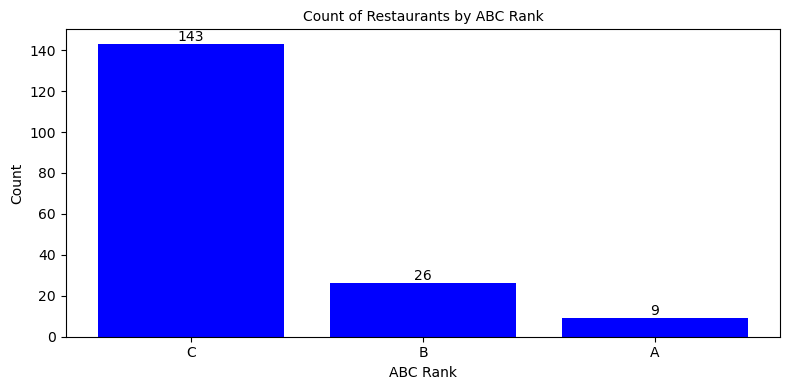

In [15]:
# Create a bar chart of the count column with numeric detail displayed
plt.figure(figsize=(8, 4))
bars = plt.bar(abc_summary_table.index, abc_summary_table['Count'], color='blue')

# Add count values as annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.title('Count of Restaurants by ABC Rank', fontsize=10)
plt.xlabel('ABC Rank')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
# Filter the restaurant_summary DataFrame to get only "A" ranked restaurants
a_restaurants = restaurant_summary[restaurant_summary['ABC Rank'] == 'A']

# Display the list of "A" ranked restaurants
print(a_restaurants)

                           Count  Percentage ABC Rank
restaurant_name                                      
Shake Shack                  219   11.538462        A
The Meatball Shop            132    6.954689        A
Blue Ribbon Sushi            119    6.269758        A
Blue Ribbon Fried Chicken     96    5.057956        A
Parm                          68    3.582719        A
RedFarm Broadway              59    3.108535        A
RedFarm Hudson                55    2.897787        A
TAO                           49    2.581665        A
Han Dynasty                   46    2.423604        A


### B. ABC ANALYSIS BY cost_of_the_order

In [17]:
# Summarize the cost by restaurant
restaurant_costs = df.groupby('restaurant_name')['cost_of_the_order'].sum()

# Calculate the percentage of costs
restaurant_percentage = (restaurant_costs / restaurant_costs.sum()) * 100

# Format count values to include the percentage
restaurant_costs_with_percent = restaurant_costs.astype(str) + ' (' + restaurant_percentage.round(2).astype(str) + '%)'

# Rank the restaurants based on the cost of orders using ABC method
restaurant_ranks = pd.qcut(restaurant_costs, q=[0, 0.8, 0.95, 1], labels=['C', 'B', 'A'])

# Create a new DataFrame to store the costs, percentage, and ABC ranks
restaurant_summary = pd.DataFrame({'Total Cost': restaurant_costs, 'Percentage': restaurant_percentage, 'ABC Rank': restaurant_ranks})

# Sort the DataFrame by ABC Rank in descending order
restaurant_summary = restaurant_summary.sort_values(by='Total Cost', ascending=False)

# Format the DataFrame for display
styled_table = restaurant_summary.style.format({
    'Percentage': '{:.2f}%'
}).set_properties(**{'text-align': 'center'})

# Display the styled table
styled_table

,Total Cost,Percentage,ABC Rank
restaurant_name,,,
Shake Shack,3579.530000,11.43%,A
The Meatball Shop,2145.210000,6.85%,A
Blue Ribbon Sushi,1903.950000,6.08%,A
Blue Ribbon Fried Chicken,1662.290000,5.31%,A
Parm,1112.760000,3.55%,A
RedFarm Broadway,965.130000,3.08%,A
RedFarm Hudson,921.210000,2.94%,A
TAO,834.500000,2.66%,A
Han Dynasty,755.290000,2.41%,A


In [18]:
# Group the restaurant_summary DataFrame by ABC Rank and calculate the sum of Total Cost for each rank category
summary_by_rank = restaurant_summary.groupby('ABC Rank')['Total Cost'].sum()

# Calculate the percentage of total cost for each rank category
percentage_by_rank = (summary_by_rank / summary_by_rank.sum()) * 100

# Create a new DataFrame to store the summarized cost by rank category
summary_table = pd.DataFrame({'Total Cost': summary_by_rank, 'Percentage': percentage_by_rank})

# Sort the summary_table DataFrame by Total Cost in descending order
summary_table_sorted = summary_table.sort_values(by='Total Cost', ascending=False)

# Format the DataFrame for display
styled_summary_table = summary_table_sorted.style.format({
    'Percentage': '{:.2f}%'
}).set_properties(**{'text-align': 'center'}).set_table_styles([{
    'selector': 'thead',
    'props': [('text-align', 'center')]
}])

# Display the styled summary table
styled_summary_table

,Total Cost,Percentage
ABC Rank,,
A,13879.870000,44.32%
B,10063.650000,32.14%
C,7371.300000,23.54%


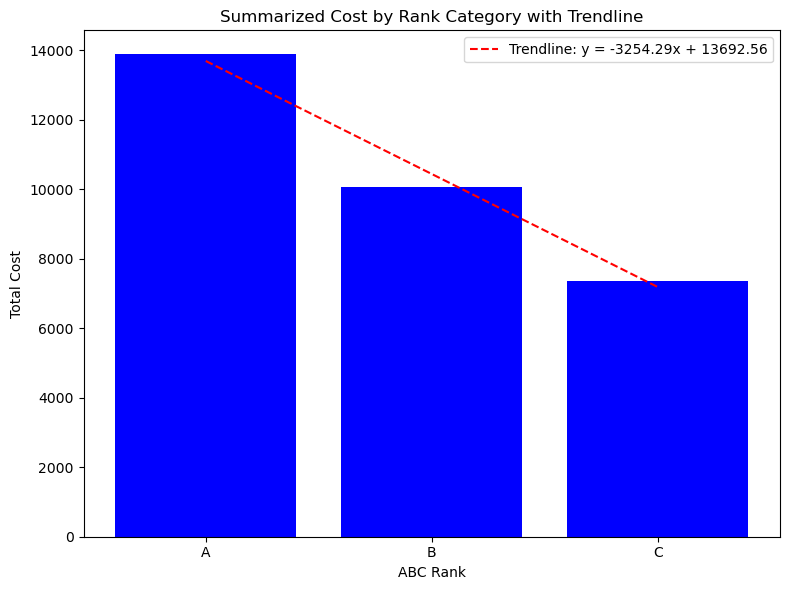

In [19]:
from scipy import stats

# Plotting the summarized cost by rank category
plt.figure(figsize=(8, 6))
bars = plt.bar(summary_table_sorted.index, summary_table_sorted['Total Cost'], color='blue')

# Fit a linear regression model
x = np.arange(len(summary_table_sorted))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, summary_table_sorted['Total Cost'])
trendline = slope * x + intercept

# Plot the trendline
plt.plot(x, trendline, color='red', linestyle='--', label=f'Trendline: y = {slope:.2f}x + {intercept:.2f}')

plt.title('Summarized Cost by Rank Category with Trendline')
plt.xlabel('ABC Rank')
plt.ylabel('Total Cost')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

### Conclusion and Recommendations

### ABC Analysis:
* A. Analyze order frequency per restaurant to identify top performers and areas for improvement.
* B. Examine order costs per restaurant to understand profitability and develop strategies for cost optimization.
#### Benefits:

* Enhance customer satisfaction by focusing on popular restaurants.
* Optimize delivery routes and processes to reduce costs and improve efficiency.
* Increase revenue by targeting high-profit restaurants and optimizing delivery margins.
#### Strategies recomended:

* Implement loyalty programs or incentives for top-performing restaurants to encourage repeat business.
* Offer training or support to lower-performing restaurants to improve service quality.
* Negotiate better terms with high-volume restaurants to increase profitability.
* Overall, conducting an ABC analysis of order frequency and costs per restaurant will provide valuable insights to FoodHub, enabling informed decision-making and enhancing overall operations.

---